# Data Visualization on Geographic Variation in Potentially Preventable Inpatient Hospital Stays in the US

**Potentially preventable hospitalizations** are common in the United States. 

> In 2017, approximately 12.9 percent of all adult nonobstetric inpatient stays were potentially preventable, and most of these stays involved chronic health conditions such as diabetes, chronic lung disease, and severe heart conditions. 

The Agency for Healthcare Research and Quality (AHRQ) developed Prevention Quality Indicators (PQIs) to identify inpatient hospitalizations that could possibly be avoided through better disease management or outpatient treatment. 


Their recent September [statistical brief](https://www.hcup-us.ahrq.gov/reports/statbriefs/sb264-Chronic-Condition-Preventable-Hospitalizations-2016.jsp) focused on geographic variations on potentially preventable inpatient stays for chronic health conditions in 2016. This statistical brief is a regular report from the AHRQ sponsored Healthcare Cost and Utilization Project (HCUP). 

Statistics are presented for 32 States that had released their 2016 quality indicator data through HCUPnet, an online query tool for county and substate region-level statistics. The statistical brief presents, for each state, the population rates of potentially preventable inpatient stays among adults for **chronic conditions overall** and for three specific chronic conditions: **chronic obstructive pulmonary disease (COPD)**, **congestive heart failure (CHF)**, and **diabetes**. 


Understanding potentially preventable inpatient stays for chronic conditions is critical to improve quality of care and reduce healthcare costs. It is also important for conserving limited hospital capacity for nonpreventable stays. Federal and State health officials can leverage the results from the dataset reported to identify areas where potentially preventable inpatient stays for chronic conditions are highest. Understanding variation between states will help guide federal and state public health initiatives to better plan hospital resources and strengthen disease management and outpatient treatment programs.  

# Considerations for Visualization Techniques

### Chloropleth Maps

A Chloropleth map is a map composed of colored polygons. Think about the classic red and blue map of U.S. election results, that's a Chloropleth! It is a visualization that displays information based on location and colors. 

Chloropleth maps are primary used to 1) show distribution over geographic locations, and 2) show variations in intensity across an color-encoded variable among those geographic locations. Both are excellent use cases for visualizing the 32 state-level data points on preventable inpatient stays across different health conditions in the AHRQ statistical brief. 

In this notebook, I will first chose a health condition group and attempt to map its preventatble inpatient stay rates by State, and use color to encode the variations in rates among the states. Then I shall explore ways to map all four health conditions together in one chart.  

Although Chloropleth maps are great at conveying geographic variation, it is not so good at precise interstate comparisons. This is because humans are inherently not good at perceiving color saturation, especially those in close proximity and below our just-noticable difference threshold. To further understand just how much variation there are between states' preventable inpatient stays per condition, we need the good old bar charts. 

### Bar Chart

A bar chart is a visualization which plots bars based on two different variables (x and y components). It is most often used for comparison of a quanatative variable across a categorical variable.

Bar charts are primarily used to show precise comparison between categorical groups. 

In this notebook, I plan to complement the state-level health conditions chloropleth map with a faceted bar chart that will plot the states with the most potentially preventable inpatient stays from high to low based on their overall Chronic Conditions rates. This way one can easily identify states with the most opportunties to improve their care.

# Considerations for Library Selection

While searching for the right Library to use among Bokeh, Plotly, Altair, Seaborn and Matplotlib, I had the following considerations:

* Personal Experience Fit
    
    I wanted to practice learning a new graphing library that can produce high-quality, client-facing graphs. This critera eliminates Altair, which I had worked with during SIADS 522. It also eliminates Matplotlib and Seaborn, libraries that I have been learning in this course. 
    
    Bokeh and Plotly are both strong contenders left.
    
* Visualization Fit
    
    I planned to use a series of Choropleth maps to visualize the variation in preventable inpatient stays at the state level across different health condition groups. This is a useful new visualization technique that I would like to learn. 
    
    To better understand how Bokeh and Plotly support Choropleth maps, I spent some time looking at documentation around mapping geo data between the two libraries. It quickly became clear that Plotly had a width range of examples from basic to complex subplots involving Choropleth maps, and easily accesible API documentation for further styling and customization of Choropleth maps. This was not the case for Bokeh, it was difficult to find the equivalent thoroughness in documentation, or a worked example beyond one reference chart on an outdated verison's gallery page. 
    
    Plotly emerged as the better choice between the two libraries. As an additional plus, Plotly also has excellent documentation for faceted bar charts. And so I was sold.  


  

# Plotly Python Library 

The [plotly.py](https://plot.ly/python/) library is a Python graphing library that supports a wide variety of basic and complex chart types for different use cases. It is built on top of the Plotly JavaScript library (plotly.js). Plotly allows users to create high-quality visualizations that can be displayed in Jupyter notebooks, used as standalone HTML files, or embedded in python built Dashboard web apps made by Plotly. 


Plotly is free to access and open-source. Plotly users can view the library source code on [Github](https://github.com/plotly/plotly.py), contribute and expand the library, and report issues to Plotly. Plotly's website is very user-friendly and filled with detailed Figure and API references. There is also a robust gallery of worked examples for almost all chart types. This makes it easy to learn the library and easily locate more in depth customization options. 

Plotly also has a high-level module [plotly.express](https://plotly.com/python/plotly-express/#overview) (usually imported as `px`) that is terse and consistent through different figure types. On average, any figure created by Plotly Express uses between 5 to 100 times less code than using the Plotly graph objects alone. This additional module is a great entry-point for Plotly beginners and a huge time-saver for seasoned data scientists during exploratory data visualization sessions. 



# Installing Plotly

#### To install Plotly using pip:

$ pip install plotly==4.12.0


#### To install Plotly using conda:

$ conda install -c plotly plotly=4.12.0


#### To use Plotly in the classic Jupyter Notebook:

install `notebook` and `ipywidgets` packages using pip:

$ pip install "notebook>=5.3" "ipywidgets>=7.2"

or conda:

$ conda install "notebook>=5.3" "ipywidgets>=7.2"


#### To use Plotly in JupyterLab:

* install `jupyterlab` and `ipywidgets` packages using pip:
        
        $ pip install jupyterlab "ipywidgets>=7.5"
  
  
    or conda:
  
      $ conda install jupyterlab "ipywidgets=7.5"


* And install the required JupyterLab renderer support extensions (note: require [Node.js](https://nodejs.org/en/) installation):
    
    
    jupyter labextension install jupyterlab-plotly@4.12.0



For more information on getting started, see the official Plotly [documentation](https://plotly.com/python/getting-started/). 

#### Use the code cell below to install the appropriate Plotly dependencies based on your preferred notebook environment

# Import Libraries
The following libraries will be used for data cleaning and visualizations

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load and Clean Dataset

### Data Loads

I will be using state level data collected from the recently published [statistical brief](https://www.hcup-us.ahrq.gov/reports/statbriefs/sb264-Chronic-Condition-Preventable-Hospitalizations-2016.jsp) by the Agency for Healthcare Research and Quality.


In [2]:
# import table data from the article with pd.read_html() 
df_list = pd.read_html('https://www.hcup-us.ahrq.gov/reports/statbriefs/sb264-Chronic-Condition-Preventable-Hospitalizations-2016.jsp',
                      match = 'Table 1. State-level rates per 100,000 population of potentially preventable inpatient stays for chronic conditions')

df = df_list[0] # target table is the first table in the list

df.head(7)

0  \
0  Table 1. State-level rates per 100,000 populat...   
1                                              State   
2                                              State   
3                                      United States   
4                                             Alaska   
5                                            Arizona   
6                                           Arkansas   

                                                   1  \
0  Table 1. State-level rates per 100,000 populat...   
1                                 Chronic conditions   
2                                              Rate*   
3                                              962.7   
4                                              523.2   
5                                              595.2   
6                                              945.8   

                                                   2  \
0  Table 1. State-level rates per 100,000 populat...   
1                                 Chronic conditions   
2                                               Rank   
3                                                  -   
4                                                 27   
5                                                 22   
6                                                  9   

                                                   3  \
0  Table 1. State-level rates per 100,000 populat...   
1                                               COPD   
2                                              Rate*   
3                                              464.5   
4                                              273.1   
5                                              253.7   
6                                              478.8   

                                                   4  \
0  Table 1. State-level rates per 100,000 populat...   
1                                               COPD   
2                                               Rank   
3                                                  -   
4                                                 20   
5                                                 23   
6                                                  8   

                                                   5  \
0  Table 1. State-level rates per 100,000 populat...   
1                                                CHF   
2                                              Rate*   
3                                              409.0   
4                                              221.7   
5                                              228.5   
6                                              375.8   

                                                   6  \
0  Table 1. State-level rates per 100,000 populat...   
1                                                CHF   
2                                               Rank   
3                                                  -   
4                                                 27   
5                                                 26   
6                                                 10   

                                                   7  \
0  Table 1. State-level rates per 100,000 populat...   
1                                           Diabetes   
2                                              Rate*   
3                                              186.9   
4                                               98.3   
5                                              155.5   
6                                              203.0   

                                                   8  \
0  Table 1. State-level rates per 100,000 populat...   
1                                           Diabetes   
2                                               Rank   
3                                                  -   
4                                                 28   
5                                                 16   
6                                                  5   

          

Imported State abbreviation data from Wikipedia, this will come in handy later with Plotly's native Chloropleth map parameters. 

In [3]:
# import the postal abbreviations for each state from Wikipedia
state_abbrev = pd.read_html('https://simple.wikipedia.org/wiki/U.S._postal_abbreviations#States')
abbrev = state_abbrev[0] # target table is the first table in the list

abbrev.head()

0           1
0  State Abbreviation State Name AK Alaska AL Ala...         NaN
1                                 State Abbreviation  State Name
2                                                 AK      Alaska
3                                                 AL     Alabama
4                                                 AR    Arkansas

### Data Cleaning Steps

To visualize the state level rates of potentially preventable inpatient stays using Plotly, I cleaned the dataset with the following steps:

* Change datatype of numeric values and correct typo in 'Pennsylvania'
* Adding abbreviations to each state using the State abbreviation data imported from Wikipedia

In [4]:
# reduce df to relevant columns on rates, and rows with state data
df = df.iloc[4:36,0:9]

# all numeric values in table are stored as str, change their data type
df = df.astype({1:'float',
                #2:'int',
                3:'float',
                #4:'int',
                5:'float',
                #6:'int',
                7:'float'})#,
                #8:'int'})

# set column names
df.columns = ['State', 'Chronic conditions rate', 'Chronic conditions rank',
             'COPD rate', 'COPD rank',
             'CHF rate', 'CHF rank',
             'Diabetes rate', 'Diabetes rank']

# correct the incorrect spelling of 'Pannsylvania' in table
df.loc[28,'State'] = 'Pennsylvania'

In [5]:
# Adding abbreviations to each state using the State abbreviation data imported from Wikipedia

# reduce abbrev table to relevant columns, and rows with state data, rename columns to prepare for merge
abbrev = abbrev.iloc[2:].rename(columns = {0:'Abbrev',
                                           1:'State'}) 

# Adding abbreviations to each state with pd.merge()
df_abbrev = df.merge(abbrev, on = 'State', how = 'left')

df_abbrev.head()

State  Chronic conditions rate Chronic conditions rank  COPD rate  \
0      Alaska                    523.2                      27      273.1   
1     Arizona                    595.2                      22      253.7   
2    Arkansas                    945.8                       9      478.8   
3  California                    677.4                      19      265.3   
4    Colorado                    481.6                      28      186.8   

  COPD rank  CHF rate CHF rank  Diabetes rate Diabetes rank Abbrev  
0        20     221.7       27           98.3            28     AK  
1        23     228.5       26          155.5            16     AZ  
2         8     375.8       10          203.0             5     AR  
3        21     318.1       19          145.8            18     CA  
4        29     215.2       28          110.5            27     CO

# Create Choropleth Maps with Plotly

### Basic Choropleth Map with Plotly Express
Now that we have a clean dataset, we can start visualizing the state level data for potential preventable inpatient stays with the Express library in Plotly. 

Here is a demonstration of a choropleth map on state-level preventable stays for `Chronic Conditions rate` from the cleaned dataframe `df_abbrev`. The parameters used for a basic choropleth map include:
- input dataframe
- **locations** - Column in dataframe used for location mapping by **locationmode**
- **locationmode** - Determines the set of locations used to match entries in locations to regions on the map. To use the built-in `USA-states` geometry, provide **locations** as two-letter state abbreviations 
- **scope** - Set scope of map
- **color** - Column in dataframe used to assign colors to the polygon marks in Choropleth maps


for more: https://plotly.com/python-api-reference/generated/plotly.express.choropleth.html

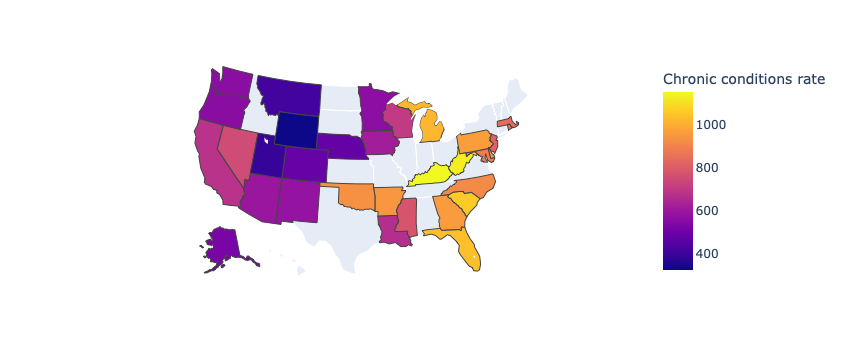

In [6]:
def map_cc(df):
    fig = px.choropleth(df, 
                        locations='Abbrev', #use 2-letter state abbrevs
                        locationmode = 'USA-states', 
                        scope='usa', #set scope to USA only
                        color='Chronic conditions rate')
    
    fig.show()
    
    
map_cc(df_abbrev)    

Not bad! Let's use a couple more parameters below to help make this graph more compelling 

- **color_continuous_scale** - Specify a continuous color scheme 
- **title** - Set the map title
- **labels** - Override default use of column names as labels


for more: https://plotly.com/python-api-reference/generated/plotly.express.choropleth.html

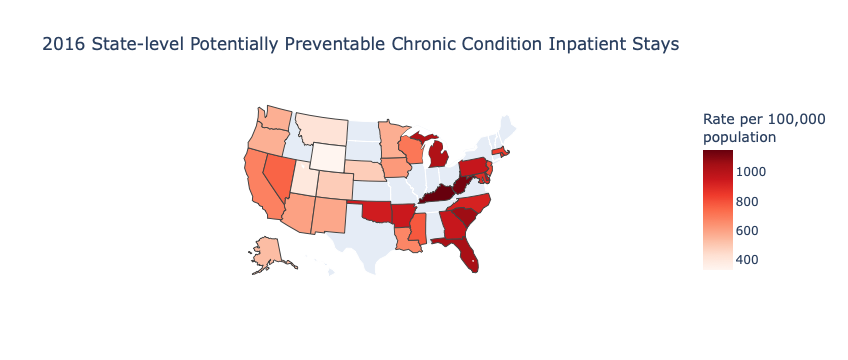

In [7]:
def map_cc(df):
    fig = px.choropleth(df,
                        locations='Abbrev', 
                        locationmode = 'USA-states', 
                        scope='usa',
                        color='Chronic conditions rate', 
                        color_continuous_scale='Reds', #single color will be easier to identify variations
                        title='2016 State-level Potentially Preventable Chronic Condition Inpatient Stays',
                        labels={'Chronic conditions rate':'Rate per 100,000<br>population'}) 
                        #specify that rate is per 100,000 population and use <br> for a line break
    fig.show()
    
    
map_cc(df_abbrev)   

Much better, now we can clearly see the variations in potentially preventable inpatient stays for chronic conditions across the 32 states with a unified color scheme. States with the highest rate are intuitively labelled with a darker shade, making it easy for one to identify regions to focus on improvement. 

### Create a figure with multiple Choropleth Maps 

Now that we know how to create choropleth maps, let's try our hand at creating a figure with all four health conditions' rate Chloropleth Maps together.


To create a figure with multiple subplots, we need to use`make_subplots()`, imported earlier in our library prep

> **from** plotly.subplots **import** make_subplots

We need to first define the parameters of subplots within a figure using the following:

* **rows** - number of rows
* **cols** - number of columns
* **vertical_spacing** - vertical space between the subplots
* **specs** - by default, the make_subplots function assumes that the traces that will be added to all subplots are 2-dimensional cartesian traces (e.g. scatter, bar, histogram, violin, etc.). Traces with other subplot types (e.g. scatterpolar, scattergeo, parcoords, etc.) are supporteed by specifying the type subplot option in the specs argument to make_subplots. 
* **subplot_titles** - configure subplot titles

for more on Plotly subplots: https://plotly.com/python/subplots/

In [8]:
combo_fig1 = make_subplots(rows=4, # I plan to stack the maps on top of each other in 4 rows
                           cols=1, # 1 column to so that each map gets to be displayed at full width
                           vertical_spacing=0.05,
                           specs=[[{"type": "choropleth"}], 
                                   [{"type": "choropleth"}],
                                   [{"type": "choropleth"}], 
                                   [{"type": "choropleth"}]],
                            subplot_titles=('Chronic Conditions Overall',
                                            'Chronic Obstructive Pulmonary Disease (COPD)', 
                                            'Congestive Heart Failure (CHF)', 
                                            'Diabetes')
)

Next, we can focus on creating each of the four subplots. We will use the more expansive `plotly.graph_objects` library, imported earlier as follows:

>import plotly.graph_objects as go

Each subplot is added via `.add_trace()` and accepting a Plotly graphic object. Here we will use `go.Choropleth()` trace since we are creating Choropleth maps. 

We can define the parameters of each individual Choropleth subplot using the following: 

* **locations** - dataframe column used for location mapping by **locationmode**
* **z** - dataframe column used to assign colors to the polygon marks in Choropleth maps
* **locationmode** - determines the set of locations used to match entries in locations to regions on the map. To use the built-in `USA-states` geometry, provide **locations** as two-letter state 
* **hoverinfo** - determines which trace information appear on hover. 
* **colorscale** - sets the colorscale
* **colorbar** - configure the color bar
* **mark** - configure teh polygon mark


for more on Plotly Cholorpleth trace references: https://plotly.com/python/reference/choropleth/

In [9]:
# we can use a for loop to reduce duplicating code between subplots

# loop over the rate columns for each health condition 
for i, column in enumerate(['Chronic conditions rate','COPD rate','CHF rate','Diabetes rate']):
    combo_fig1.add_trace(go.Choropleth(locations=df_abbrev['Abbrev'], 
                                        z=df_abbrev[column],
                                        locationmode='USA-states',
                                        hoverinfo='location+z',
                                        colorscale='Reds', 
                                        colorbar = dict(y=0.91-0.263*i, # y position of color legend
                                                        len=0.2, #len of color legend as a proportion of fig
                                                        title='Rate per 100,000<br>population'),
                                        marker=dict(line=dict(color='white')),#turn state outlines white
                                     ),row=i+1, 
                                         col=1)
    


Lastly, we will can do some final updates to the layout of the figure via `.update_layout()` using the following: 

* **geo** - define the geo related parameters
* **height** - define height of overall figure
* **width** - define width of overalll figure
* **title_text** - add a title to the overall figure




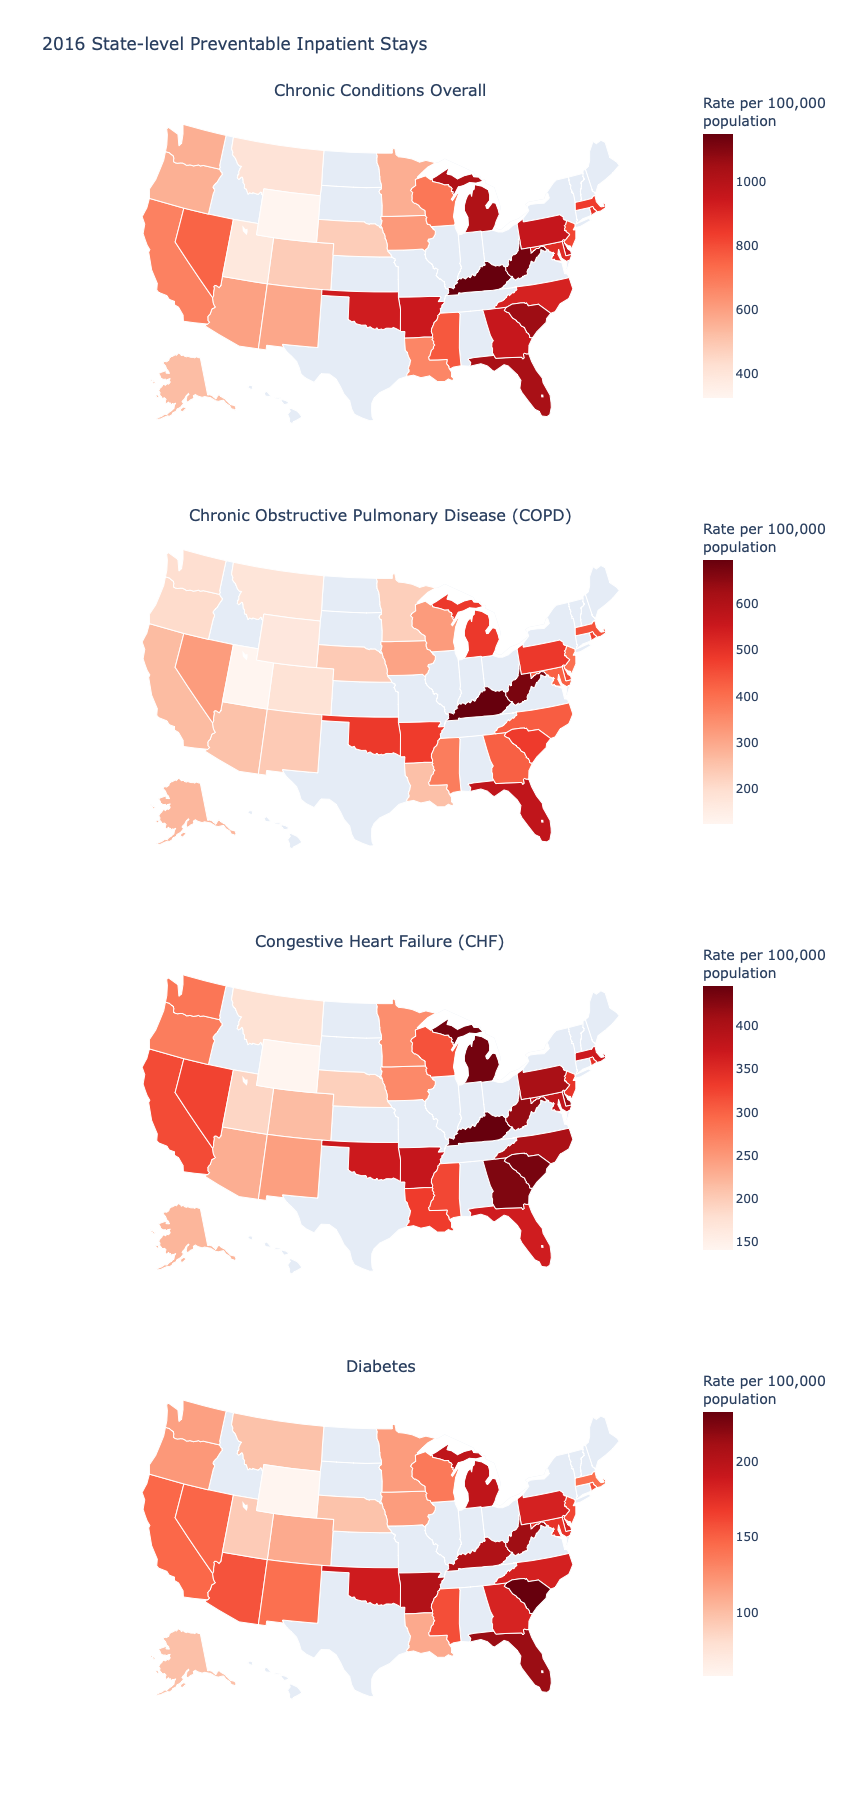

In [10]:
combo_fig1.update_layout(geo = dict(scope='usa'), #define subplot 1 map scope to USA
                         geo2 = dict(scope='usa'), #define subplot 2 map scope to USA
                         geo3 = dict(scope='usa'),  #define subplot 3 map scope to USA
                         geo4 = dict(scope='usa'),  #define subplot 4 map scope to USA
                         height=1800, 
                         width=900,
                         title_text='2016 State-level Preventable Inpatient Stays'
)

combo_fig1.show()

The combine figure not only shows geographic variation across states for each condition but it also shows how geographic patterns for specific chronic diseases differ. 

As a next step, let's dive deeper into the precise variation and ratings with bar chart. 

# Create Faceted Bar Chart with Plotly

### Quick data transformation

Faceted Bar Charts requires long form data. So let's do some data transformation with ``pd.melt()``.


In [11]:
df_long = pd.melt(df_abbrev, 
                  id_vars=['State'], #keep state as ID
                  value_vars=['Chronic conditions rate','COPD rate','CHF rate','Diabetes rate'],
                             # melt together all health condition metrics
                  var_name='metric', #rename variable column
                  value_name='rate') #rename value column

df_long.head()

State                   metric   rate
0      Alaska  Chronic conditions rate  523.2
1     Arizona  Chronic conditions rate  595.2
2    Arkansas  Chronic conditions rate  945.8
3  California  Chronic conditions rate  677.4
4    Colorado  Chronic conditions rate  481.6

### Creating a faceted bar chart with Plotly Express

Faceted bar charts can be created fairly easily using `px.bar()` using the long form dataframe **df_long** above. The parameters used for a basic bar chart may include:

- input dataframe
- **x** - dataframe column name for x-axis variable
- **y** - dataframe column name for y-axis variable
- **color** - dataframe column name to assign colors to the bars
- **facet_col** - dataframe column name to break into faceted subplots
- **title** - set the map title
- **height** - set the height of the bar chart


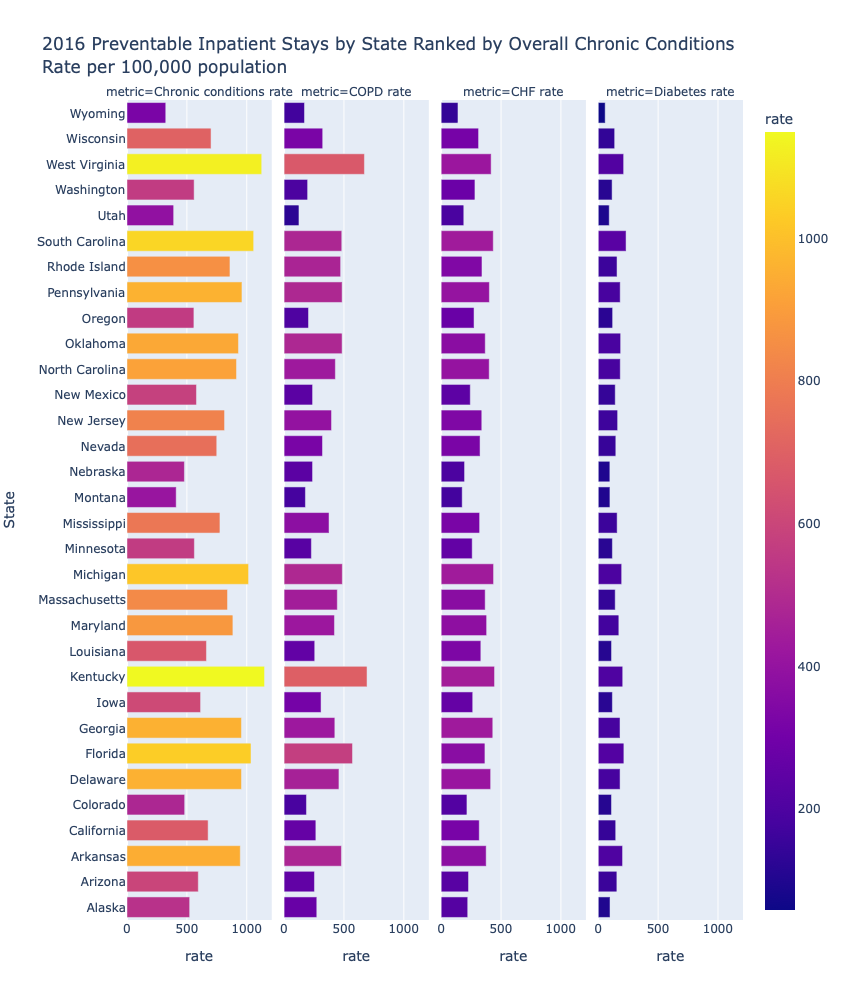

In [12]:
PIS_bar = px.bar(df_long,
                 x='rate',y='State', color ='rate',
                 facet_col = 'metric',
                 title='2016 Preventable Inpatient Stays by State Ranked by Overall Chronic Conditions<br>Rate per 100,000 population',
                 height=1000) #extra room for all 32 states to show up

PIS_bar.show()

We can do some additional styling using following:

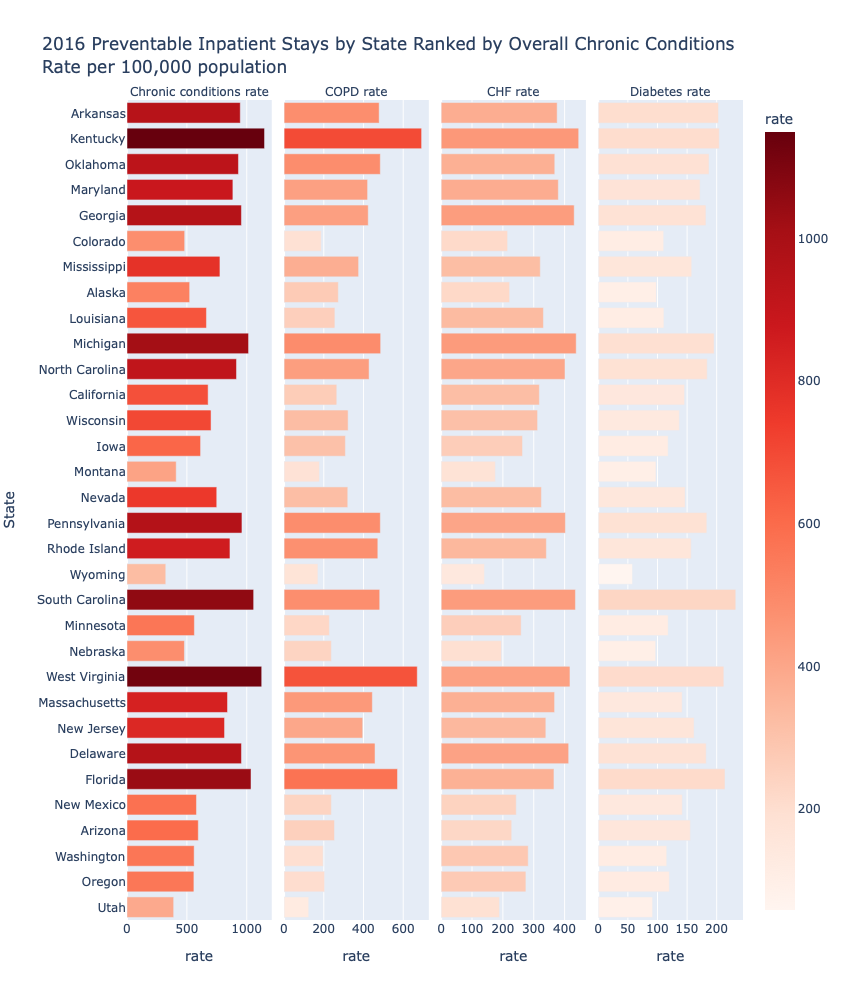

In [13]:
# uncouple the X-axes for facet bar charts so they can auto adjust
PIS_bar.update_xaxes(matches=None)

# sort the states by potentially preventable inpatient stay rates for Overall Chronic Conditions
# highest rates should show up first
PIS_bar.update_layout(yaxis={'categoryorder':'total ascending'})


# use a unified color scale
PIS_bar.update_coloraxes(colorscale='Reds') 


# clean up figure annotations from 'metric = health condition' to just show 'health condition'
PIS_bar.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

PIS_bar.show()

With the chart above, we can quickly identify the states with the most opportunity to improve on their care for Chronic conditions overall. 

We also see that the specific chronic conditions (COPD, CHF and Diabetes) rankings tend to follow those of the overall chronic conditions. States with the most opportunity to improve in overall Chronic conditions, tend to also have lots of work to do across all the breakout chronic condition groups. 

More on updating figures see: https://plotly.com/python/creating-and-updating-figures

# Dependencies

* Python 3.5+
* Pandas
* Plotly 4.12.0
* Jupyter notebook 
    
    notebook>=5.3, ipywidgets>=7.2
* JupyterLab 
    
    ipywidgets>=7.5, [Node.js](https://nodejs.org/en/), jupyter labextension jupyterlab-plotly@4.12.0



